# Initial Data Exploration: Barro-Lee Dataset

This notebook explores the [Barro-Lee dataset](http://barrolee.com/?page_id=99) on educational attainment for the population aged 25–64. The goal is to understand the structure, identify usable metrics, and prepare it for analysis.

## Step 1: Import Libraries & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/BL_v3_MF2564.csv")

## Step 2: Initial Inspection & Clean-Up

### Shape & Columns

In [7]:
print("---Shape:\n", df.shape)
print("---Columns:\n", df.columns)

---Shape:
 (2044, 20)
---Columns:
 Index(['BLcode', 'country', 'year', 'sex', 'agefrom', 'ageto', 'lu', 'lp',
       'lpc', 'ls', 'lsc', 'lh', 'lhc', 'yr_sch', 'yr_sch_pri', 'yr_sch_sec',
       'yr_sch_ter', 'WBcode', 'region_code', 'pop'],
      dtype='object')


In [8]:
# Do the column names need changing/cleaning?
df.columns = df.columns.str.lower()
print(df.columns)

Index(['blcode', 'country', 'year', 'sex', 'agefrom', 'ageto', 'lu', 'lp',
       'lpc', 'ls', 'lsc', 'lh', 'lhc', 'yr_sch', 'yr_sch_pri', 'yr_sch_sec',
       'yr_sch_ter', 'wbcode', 'region_code', 'pop'],
      dtype='object')


### Preview Data

In [10]:
print("---Head:\n", df.head())
print("---Tail:\n", df.tail())

---Head:
    blcode  country  year sex  agefrom  ageto     lu     lp   lpc    ls   lsc  \
0       1  Algeria  1950  MF       25     64  79.68  18.33  3.50  1.63  0.54   
1       1  Algeria  1955  MF       25     64  80.31  17.57  3.70  1.71  0.50   
2       1  Algeria  1960  MF       25     64  84.61  13.38  2.91  1.68  0.65   
3       1  Algeria  1965  MF       25     64  87.12  10.53  2.59  1.93  0.87   
4       1  Algeria  1970  MF       25     64  83.25  13.82  3.63  2.47  1.36   

     lh   lhc  yr_sch  yr_sch_pri  yr_sch_sec  yr_sch_ter wbcode  \
0  0.35  0.23   0.892       0.774       0.106       0.012    DZA   
1  0.37  0.24   0.883       0.762       0.109       0.012    DZA   
2  0.34  0.22   0.731       0.610       0.110       0.011    DZA   
3  0.44  0.28   0.683       0.535       0.134       0.014    DZA   
4  0.36  0.22   0.869       0.693       0.165       0.012    DZA   

                    region_code     pop  
0  Middle East and North Africa  3226.0  
1  Middle East a

In [36]:
# Are names clean?
    # Yes, no change needed.
# Are years in columns or rows?
    # Years are in rows (long format), no change needed.
# Are tertiary columns named well?
    # More or less, here are the possible confusing ones:
"""
BLcode = Barro Lee Country Code
l = % of population's highest educational level attained
u = unschooled
p = pri = primary
s = sec = secondary
h = ter = tertiary
c = completed
yr_sch = avg years of total schooling
yr_sch_X = avg years of X schooling
WBcode = World Bank Country Code
pop = population (1000s)
"""


"\nBLcode = Barro Lee Country Code\nl = % of population's highest educational level attained\nu = unschooled\np = pri = primary\ns = sec = secondary\nh = ter = tertiary\nc = completed\nyr_sch = avg years of total schooling\nyr_sch_X = avg years of X schooling\nWBcode = World Bank Country Code\npop = population (1000s)\n"

### Data Types & Missing Data

In [13]:
print("---Info:\n", df.info())
print("---Describe:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blcode       2044 non-null   int64  
 1   country      2044 non-null   object 
 2   year         2044 non-null   int64  
 3   sex          2044 non-null   object 
 4   agefrom      2044 non-null   int64  
 5   ageto        2044 non-null   int64  
 6   lu           2044 non-null   float64
 7   lp           2044 non-null   float64
 8   lpc          2044 non-null   float64
 9   ls           2044 non-null   float64
 10  lsc          2044 non-null   float64
 11  lh           2044 non-null   float64
 12  lhc          2044 non-null   float64
 13  yr_sch       2044 non-null   float64
 14  yr_sch_pri   2044 non-null   float64
 15  yr_sch_sec   2044 non-null   float64
 16  yr_sch_ter   2044 non-null   float64
 17  wbcode       2044 non-null   object 
 18  region_code  2044 non-null   object 
 19  pop   

In [14]:
# Are there missing values?
    # Does not seem so, let's check:
df.isnull().sum()
    # Correct, no missing values.
# Are there columns with the wrong types?
    # No, although population (pop) could be an integer, keeping it as a float can make future possible calculations easier.
# Are there placeholder names for certain types (e.g.: NaNs)?
    # No.

blcode         0
country        0
year           0
sex            0
agefrom        0
ageto          0
lu             0
lp             0
lpc            0
ls             0
lsc            0
lh             0
lhc            0
yr_sch         0
yr_sch_pri     0
yr_sch_sec     0
yr_sch_ter     0
wbcode         0
region_code    0
pop            0
dtype: int64

### Unique Values & Duplicates

In [16]:
# Unique values
print("Unique countries:", df['country'].nunique()) # 146 total countries.
print("== ", df['blcode'].nunique())
print("== ", df['wbcode'].nunique())
print("Unique years:", df['year'].nunique()) # Years are multiples of 5, so there are 14 years between (including) 1950 and 2015.
print("Unique sexes:", df['sex'].unique()) # Both sexes are represented as a total.
print("Unique age bands:", df[['agefrom', 'ageto']].drop_duplicates()) # All age groups are from 25 to 64.

# Duplicates
df.duplicated().sum()

Unique countries: 146
==  146
==  146
Unique years: 14
Unique sexes: ['MF']
Unique age bands:    agefrom  ageto
0       25     64


0

In [17]:
# Are there the correct number of unique values?
    # Yes. 146 countries, years are in multiples of 5 (14 instances from 1950 to 2015), sex is total males and females, all age groups are from 25 to 64.
# Are there any duplicates?
    # No duplicates.

## Step 3: Reformat

In [19]:
df2 = df[["country", "year", "lh", "lhc", "pop"]]
df2.head(15)

,country,year,lh,lhc,pop
0,Algeria,1950,0.35,0.23,3226.0
1,Algeria,1955,0.37,0.24,3485.0
2,Algeria,1960,0.34,0.22,3682.0
3,Algeria,1965,0.44,0.28,3823.0
4,Algeria,1970,0.36,0.22,4115.0
5,Algeria,1975,0.49,0.30,4755.0
6,Algeria,1980,1.00,0.61,5793.0
7,Algeria,1985,2.10,1.32,6881.0
8,Algeria,1990,3.51,2.24,8334.0
9,Algeria,1995,5.06,3.27,10048.0


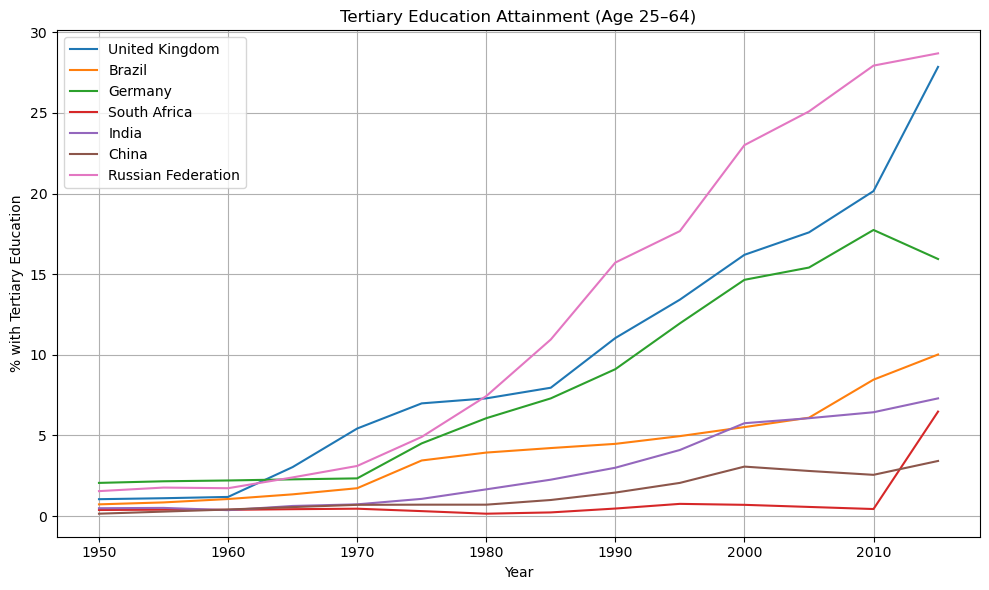

In [20]:
## Example visualisation
countries = ['United Kingdom', 'Brazil', 'Germany', 'South Africa', 'India', 'China', 'Russian Federation']
plt.figure(figsize=(10, 6))

for country in countries:
    subset = df2[df2['country'] == country]
    plt.plot(subset['year'], subset['lhc'], label=country)

plt.title('Tertiary Education Attainment (Age 25–64)')
plt.xlabel('Year')
plt.ylabel('% with Tertiary Education')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 4: Save Processed Data

In [22]:
df2.to_csv("../data/tertiary_clean.csv")